In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sns
import cv2

In [ ]:
# # Constants
# DATADIR = pathlib.Path(os.path.join(os.getcwd(),"yogaposes"))
# # train_dir = pathlib.Path(os.path.join(DATADIR , 'train_images'))
# # test_dir = pathlib.Path(os.path.join(DATADIR , 'test_images'))
# import pathlib
# train_dir = pathlib.Path('/content/drive/MyDrive/HW1/yogaposes/train_images')
# test_dir = pathlib.Path('/content/drive/MyDrive/HW1/yogaposes/test_images')
# classes = ['downdog', 'goddess','plank','tree','warrior2']

In [ ]:
# list(train_dir.glob('*'))

In [ ]:
# print(train_dir)

In [ ]:
# train_dir.exists()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import os

# ✅ Constants
img_height = 224  # Lowered from 512 for memory efficiency
img_width = 224
batch_size = 16
num_classes = 5

# ✅ Load data efficiently

from google.colab import drive
drive.mount('/content/drive')

# Example: if dataset is in /MyDrive/yogaposes/
DATADIR = "/content/drive/MyDrive/HW1/yogaposes"
train_dir = os.path.join(DATADIR, "train_images")
test_dir = os.path.join(DATADIR, "test_images")


train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# ✅ Improve performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# ✅ Define model
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

# ✅ Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# ✅ Train
model.fit(train_ds, validation_data=test_ds, epochs=10)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 977 files belonging to 5 classes.
Found 395 files belonging to 5 classes.
Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.2404 - loss: 2.3766 - val_accuracy: 0.5494 - val_loss: 1.3249
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 70s 939ms/step - accuracy: 0.5420 - loss: 1.2335 - val_accuracy: 0.7215 - val_loss: 0.9258
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 58s 938ms/step - accuracy: 0.7780 - loss: 0.7033 - val_accuracy: 0.7772 - val_loss: 0.6858
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 85s 996ms/step - accuracy: 0.9060 - loss: 0.3132 - val_accuracy: 0.8152 - val_loss: 0.6839
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 80s 973ms/step - accuracy: 0.9606 - loss: 0.1516 - val_accuracy: 0.8101 - val_loss: 0.8223
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 83s 993ms/step - accuracy: 0.9885 - loss: 0.0536 - val_accuracy: 0.7696 - val_loss: 1.0169
Epoch 7/10
62/62 ━━━

In [ ]:
# ✅ Imports
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
import numpy as np
import os

# ✅ Constants
img_height = 224
img_width = 224
batch_size = 16
epochs = 10
num_classes = 5

# ✅ Paths (change if needed)
DATADIR = "/content/drive/MyDrive/HW1/yogaposes"
train_dir = os.path.join(DATADIR, "train_images")
test_dir = os.path.join(DATADIR, "test_images")

# ✅ Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# ✅ Save class names before batching/prefetch
class_names = train_ds.class_names

# ✅ Cache, shuffle, batch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# ✅ Model
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

# ✅ Compile
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# ✅ Train
model.fit(train_ds, validation_data=test_ds, epochs=epochs)

# ✅ Evaluate model performance using sklearn
# Collect predictions and true labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    pred_labels = tf.argmax(preds, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(pred_labels.numpy())

# ✅ Classification Report
print("\n🧾 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Found 977 files belonging to 5 classes.
Found 395 files belonging to 5 classes.
Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.2317 - loss: 2.2425 - val_accuracy: 0.6354 - val_loss: 1.2185
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5370 - loss: 1.2654 - val_accuracy: 0.7316 - val_loss: 0.8290
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7367 - loss: 0.7171 - val_accuracy: 0.7671 - val_loss: 0.6702
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 61s 993ms/step - accuracy: 0.8926 - loss: 0.3760 - val_accuracy: 0.7646 - val_loss: 0.6722
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9367 - loss: 0.2028 - val_accuracy: 0.8051 - val_loss: 0.7334
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 59s 961ms/step - accuracy: 0.9865 - loss: 0.0602 - val_accuracy: 0.7367 - val_loss: 0.9582
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 59s 959ms/step - accuracy: 0.9599 - loss: 0.0900 - val_accuracy: 0.8076 - val_loss: 0.8514
Epoch 8/10
62/62 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129496 (\N{PERSON IN LOTUS POSITION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


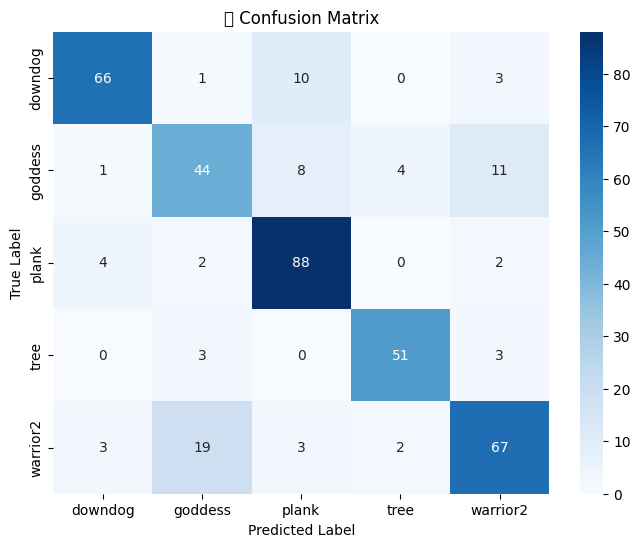

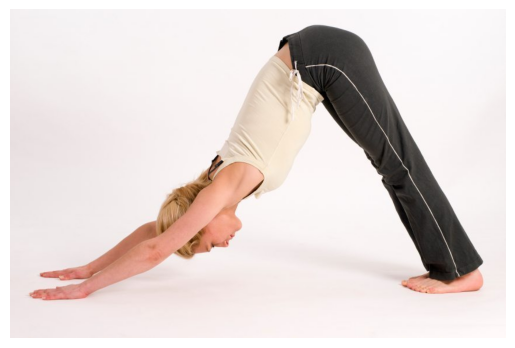

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step

🧘 Predicted Pose: downdog
🔍 Confidence: 98.33%


In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title("🧘 Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ✅ 12. Predict Single Image
def predict_single_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img = img.resize((img_width, img_height))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    img_array = img_array / 255.0

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(tf.nn.softmax(predictions[0])) * 100

    print(f"\n🧘 Predicted Pose: {class_names[predicted_class]}")
    print(f"🔍 Confidence: {confidence:.2f}%")

# ✅ 13. Example Call
plt.imshow(cv2.cvtColor(cv2.imread("/content/drive/MyDrive/HW1/yogaposes/train_images/downdog/00000128.jpg"), cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.show()
predict_single_image("/content/drive/MyDrive/HW1/yogaposes/train_images/downdog/00000134.jpg")


In [ ]:
model.save('/content/drive/MyDrive/yoga_pose_classifier.keras')
